# Thermochemical Equilibrium: Neutral ISM
Example of using `jaco` to solve for thermochemical equilibrium in the unshielded neutral ISM. Line+recombination cooling balances a constant heat source (modeling e.g. photoelectric and cosmic ray heating), and gas-phase recombination balances cosmic-ray ionization.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

## Defining the network

In [2]:
import jaco
from jaco.models.wind_comparison import cooling, heating
system = cooling + heating

# Solving thermochemical equilibrum

In [5]:
ngrid = np.logspace(-2,3,10**7)

knowns = {"n_Htot": ngrid, "x_H": np.ones_like(ngrid)} 
y = jaco.data.SolarAbundances.x("He")
guesses = {
    "T": 7e3 * np.ones_like(ngrid),
}

sol = system.solve(knowns, guesses,verbose=True,careful_steps=30)

Free symbols: {n_Htot, T, x_H}
Known values: ['n_Htot', 'x_H']
Assumed values: []
Equations solved: ['heat']
It's solvin time. Solving for {'T'} based on input {'n_Htot', 'x_H'} and assumptions about set()
num_iter average=18.959247589111328 min=1 max=23


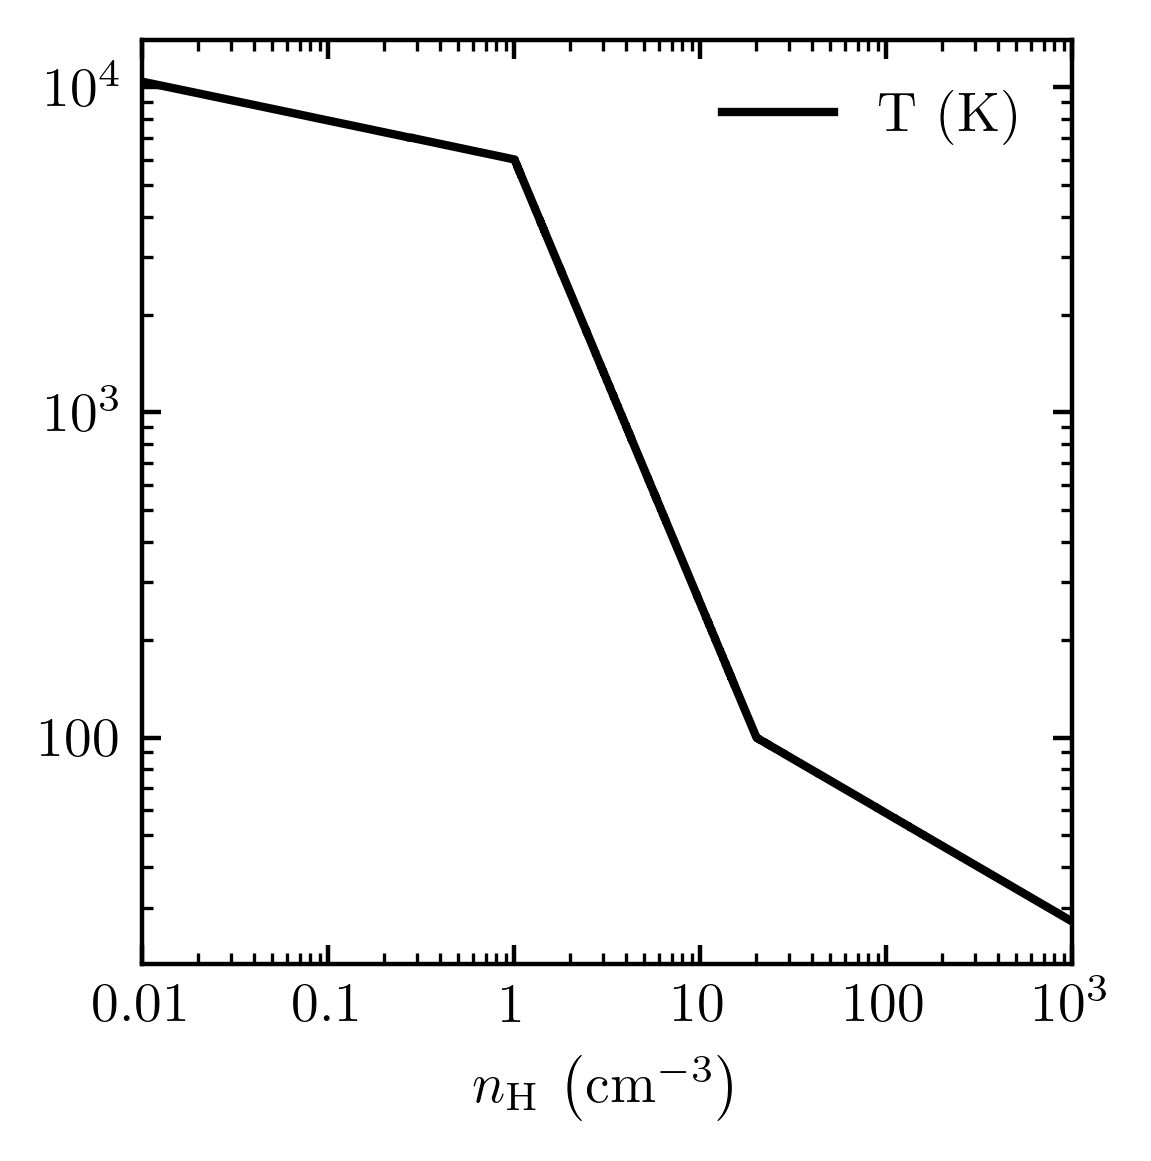

In [6]:
fig, ax = plt.subplots(figsize=(3,3))
ax.loglog(ngrid,sol["T"],label=r"T (K)",color='black')
# ax.loglog(ngrid,sol["H"],label=r"$x_{\rm H0}$",ls='dotted',color='black')
# ax.loglog(ngrid,sol["e-"],label=r"$x_{e-}$",ls='dashed',color='black')
ax.set_xlabel(r"$n_{\rm H}\,\left(\rm cm^{-3}\right)$")
ax.legend(labelspacing=0)
ax.set_xlim(ngrid[0],ngrid[-1])
#ax.set_ylim(1e-4,3e4)
#ax.set_yticks(10.**np.arange(-4,5))
ngrid0 = ngrid.copy()
sol_eq0 = sol.copy()

## Time integration: isochoric cooling from $10^4$ K

In [7]:
ngrid = np.logspace(-2,3,10**3) #np.array([1e-2])
T0 = 7e3

# start from an equilibrum solution at desired T
knowns = {"T":  T0 * np.ones_like(ngrid)} #,"x_H": np.ones_like(ngrid)} 
guesses = {
    # "H+": np.ones_like(ngrid)*0.01,
    # "He+": y*np.ones_like(ngrid)*0.98, 
    # "He++": y*np.ones_like(ngrid)*0.01,
    "u": (T0/100)* 1e10*np.ones_like(ngrid)
}
sol_eq = system.solve(knowns, guesses,verbose=True)
print(sol_eq)

Free symbols: {u, T}
Known values: ['T']
Assumed values: []
Equations solved: ['u']
It's solvin time. Solving for {'u'} based on input {'T'} and assumptions about set()
num_iter average=9.0 min=9 max=9
{'u': Array([8.588438e+11, 8.588438e+11, 8.588438e+11, 8.588438e+11,
       8.588438e+11, 8.588438e+11, 8.588438e+11, 8.588438e+11,
       8.588438e+11, 8.588438e+11, 8.588438e+11, 8.588438e+11,
       8.588438e+11, 8.588438e+11, 8.588438e+11, 8.588438e+11,
       8.588438e+11, 8.588438e+11, 8.588438e+11, 8.588438e+11,
       8.588438e+11, 8.588438e+11, 8.588438e+11, 8.588438e+11,
       8.588438e+11, 8.588438e+11, 8.588438e+11, 8.588438e+11,
       8.588438e+11, 8.588438e+11, 8.588438e+11, 8.588438e+11,
       8.588438e+11, 8.588438e+11, 8.588438e+11, 8.588438e+11,
       8.588438e+11, 8.588438e+11, 8.588438e+11, 8.588438e+11,
       8.588438e+11, 8.588438e+11, 8.588438e+11, 8.588438e+11,
       8.588438e+11, 8.588438e+11, 8.588438e+11, 8.588438e+11,
       8.588438e+11, 8.588438e+11, 8

In [8]:
import astropy.units as u
dt = 0.1 * u.Myr

knowns = {"n_Htot": ngrid, "u_0": sol_eq["u"], "x_H": np.ones_like(ngrid)} 
guesses = {
    "T": T0 * np.ones_like(ngrid),
    "u": sol_eq["u"]
}

solutions = [guesses,]
for i in range(100):
    sol = system.solve(knowns, guesses, time_dependent=["T",], dt=dt,tol=1e-6,careful_steps=40,verbose=True)
    solutions.append(sol.copy())
    guesses = sol.copy() # let latest timestep be new initial guess
    knowns["u_0"] = np.copy(sol["u"]) # update initial internal energy for next timestep

Free symbols: {n_Htot, T, x_H, u, Δt, u_0}
Known values: ['n_Htot', 'u_0', 'x_H', 'Δt']
Assumed values: []
Equations solved: ['heat', 'u']
It's solvin time. Solving for {'u', 'T'} based on input {'n_Htot', 'u_0', 'Δt', 'x_H'} and assumptions about set()
num_iter average=35.077003479003906 min=1 max=100
Free symbols: {n_Htot, T, x_H, u, Δt, u_0}
Known values: ['n_Htot', 'u_0', 'x_H', 'Δt']
Assumed values: []
Equations solved: ['heat', 'u']
It's solvin time. Solving for {'u', 'T'} based on input {'n_Htot', 'u_0', 'Δt', 'x_H'} and assumptions about set()
num_iter average=30.4320011138916 min=1 max=100
Free symbols: {n_Htot, T, x_H, u, Δt, u_0}
Known values: ['n_Htot', 'u_0', 'x_H', 'Δt']
Assumed values: []
Equations solved: ['heat', 'u']
It's solvin time. Solving for {'u', 'T'} based on input {'n_Htot', 'u_0', 'Δt', 'x_H'} and assumptions about set()
num_iter average=29.147001266479492 min=1 max=100
Free symbols: {n_Htot, T, x_H, u, Δt, u_0}
Known values: ['n_Htot', 'u_0', 'x_H', 'Δt']
As

(1, 20000.0)

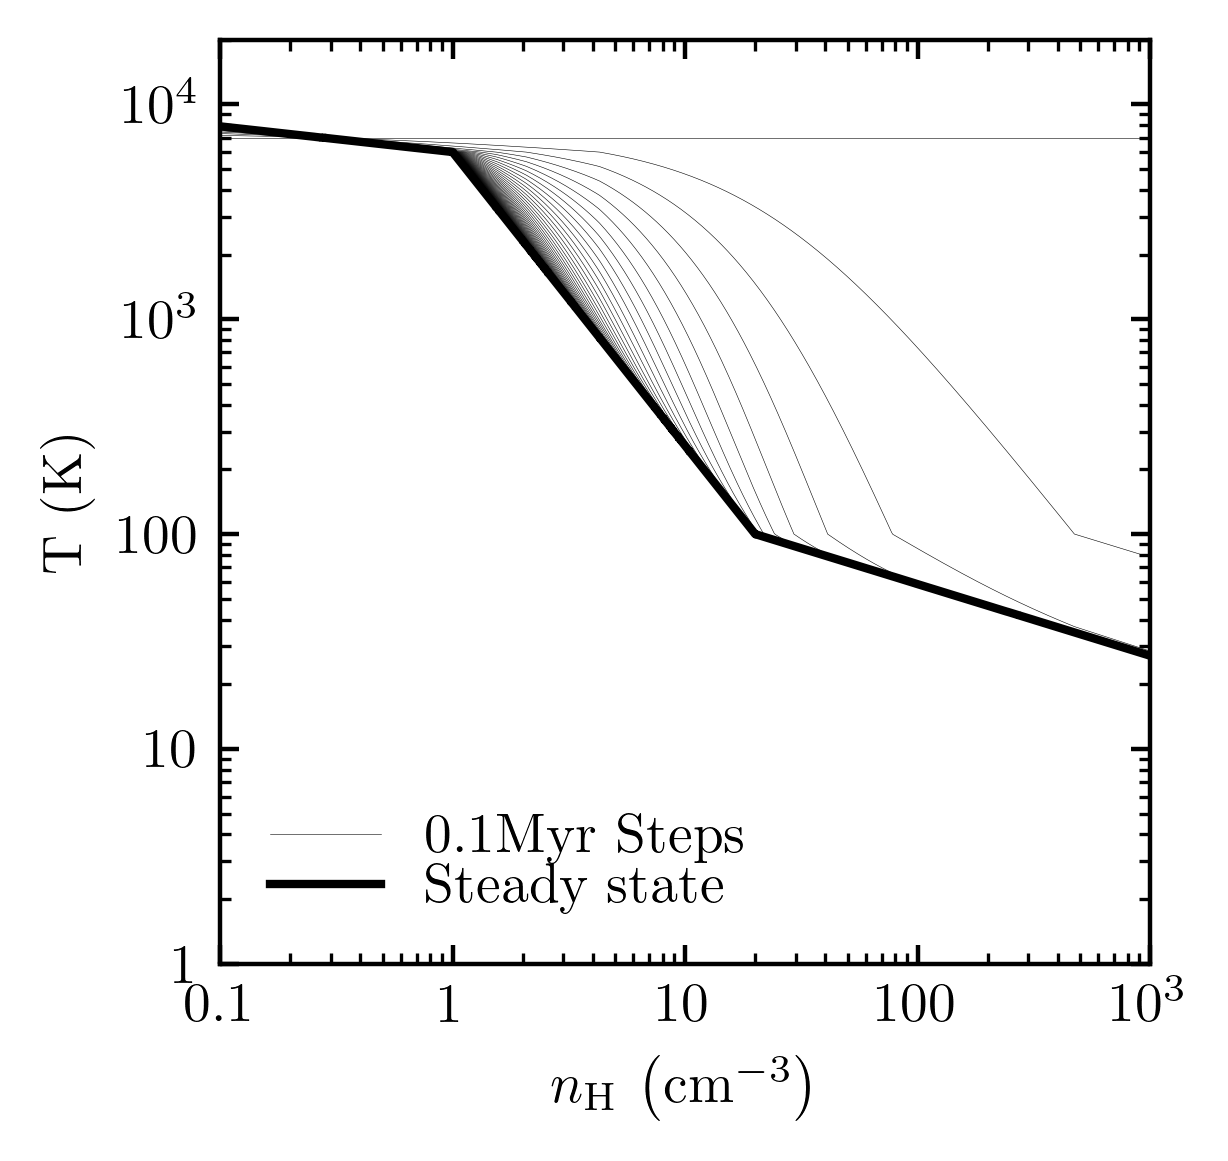

In [9]:
fig, ax = plt.subplots(figsize=(3,3))
dt_legend = True
for sol in solutions:
    ax.loglog(ngrid,sol["T"],color='black',lw=0.1,label=(r"$0.1\rm Myr$ Steps" if dt_legend else None))
    dt_legend = False
ax.loglog(ngrid0,sol_eq0["T"],color='black',label="Steady state")
ax.set_xlabel(r"$n_{\rm H}\,\left(\rm cm^{-3}\right)$")
ax.set_ylabel(r"T (K)")
ax.legend(labelspacing=0)
ax.set_xlim(0.1,ngrid[-1])
ax.set_ylim(1,2e4)

<lambdifygenerated-205>:2: RuntimeWarning: overflow encountered in exp
  return -n_H**2*exp(select([less(log(T), 2.30258508299405),greater_equal(log(T), 27.6310211159285),less(log(T), 4.60517018598809),less(log(T), 8.69951474821019),less(log(T), 9.76995615991161),less(log(T), 10.5966347330961),less(log(T), 11.3736633976367),less(log(T), 12.3458345879053),less(log(T), 12.7938593104323),less(log(T), 14.2209756660724),less(log(T), 15.0682735264596),less(log(T), 17.0736070959858),True], [-69.0775527898214,-46.9384337895135,2.99999998697116*log(T) - 75.9853080088035,0.731675663351629*log(T) - 65.5392884615192,8.33549431289496*log(T) - 131.688820945937,-0.269927827516604*log(T) - 47.6142238965834,1.89942351828434*log(T) - 70.6020477157864,-0.00984338058146309*log(T) - 48.8866886718371,-1.86982630031235*log(T) - 25.9236472085103,-0.41187017623273*log(T) - 44.5765327407682,-1.50238273377814*log(T) - 29.0683801963685,-0.254733492486591*log(T) - 47.8683002292294,0.500035898435738*log(T) - 60.754

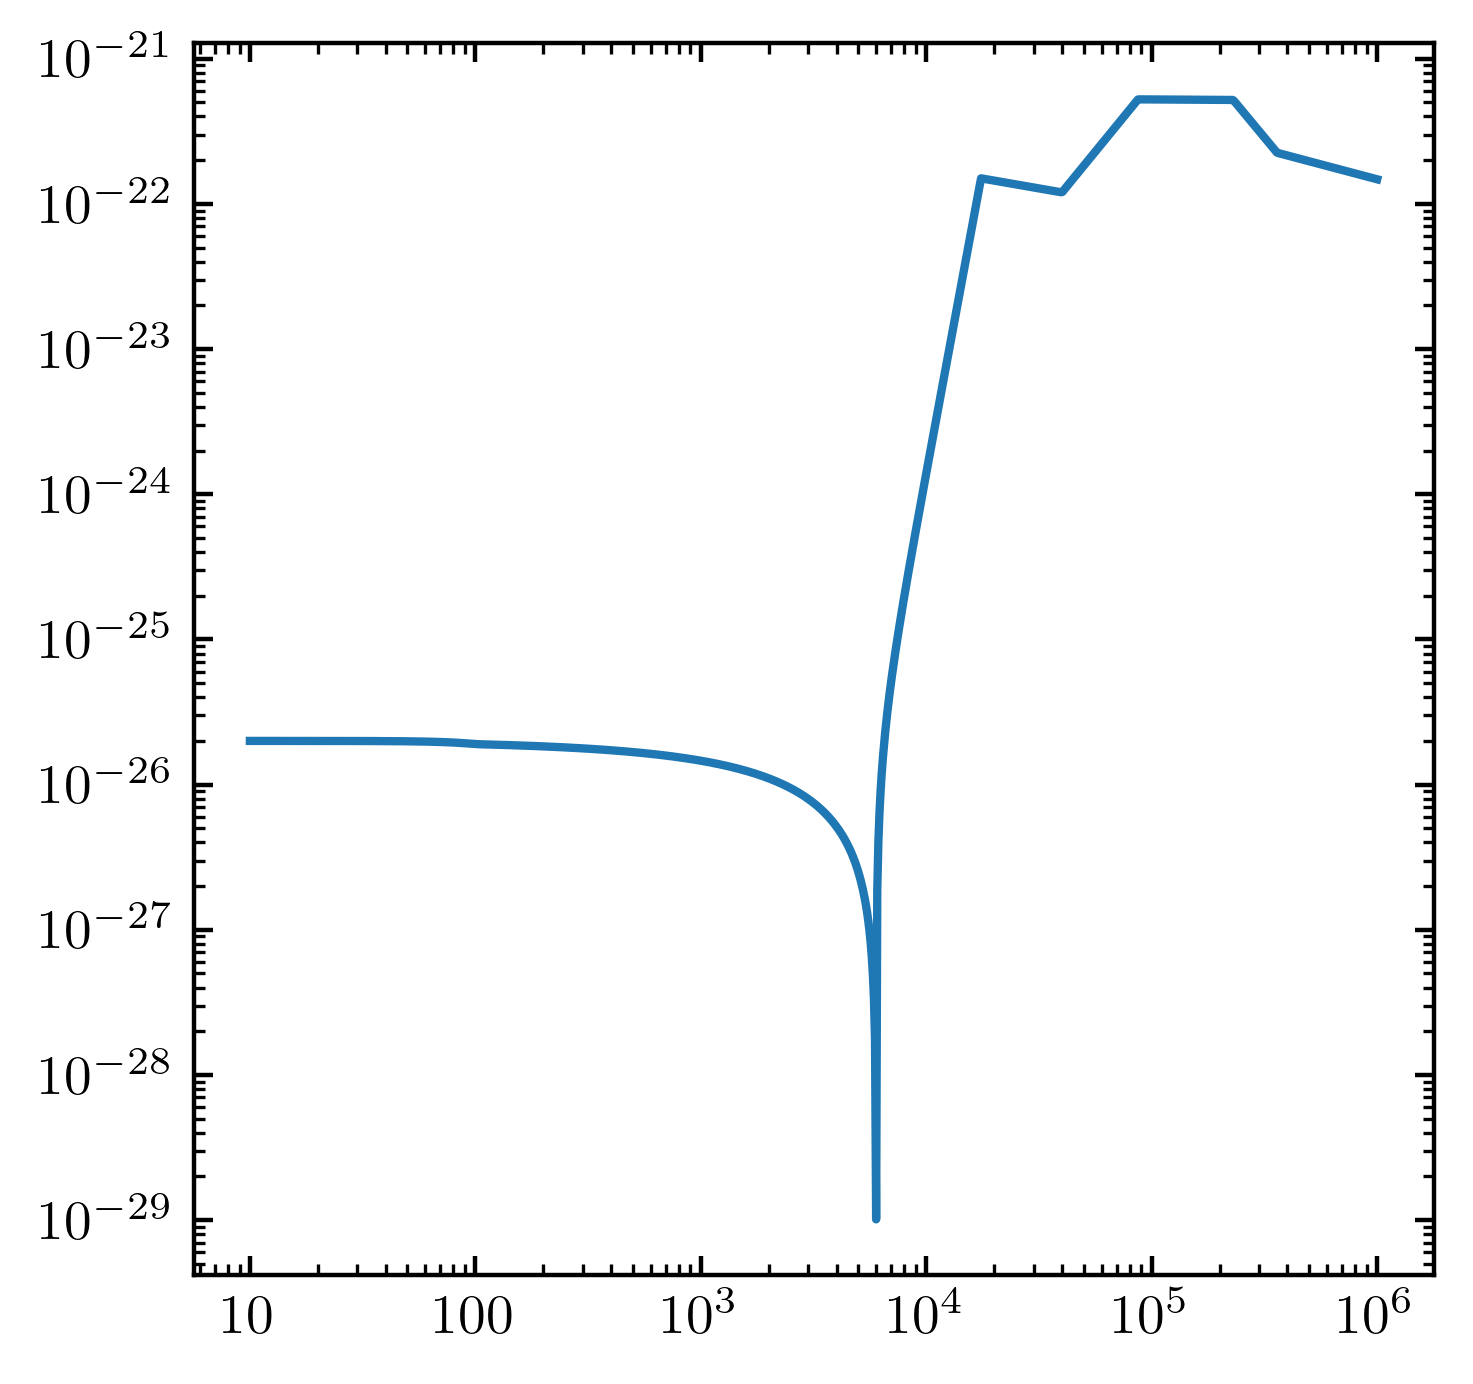

In [9]:
Tgrid = np.logspace(1,6,1000)
plt.loglog(Tgrid,np.abs(func(Tgrid,1.)))